<a href="https://colab.research.google.com/github/sumitajmera/Student-Performance-analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Mining

In [ ]:
import numpy as np  
import pandas as pd
import random

# Import libraries for plotting data
import matplotlib.pyplot as plt

# Import the classifiers used for creating the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import Classifier
from lightgbm import LGBMClassifier

# Import the metrics libraries for comparinf the results from these algorithms
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Data Import and Pre-processing

In [ ]:
df_por = pd.read_csv('student-por.csv', sep=";")
df_mat  = pd.read_csv('student-mat.csv', sep = ";")


In [ ]:
df_por.head()
df_por["address"].value_counts()

U    452
R    197
Name: address, dtype: int64

In [ ]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
len(df_por.columns)

33

In [ ]:
df_por.shape

(649, 33)

In [ ]:
df_mat.shape

(395, 33)

In [ ]:
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 1, "MS": 0, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0}

df_por.replace(cleanup_nums, inplace=True)
df_mat.replace(cleanup_nums, inplace=True)


#dataMatExt= pd.get_dummies(dataMat, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"])
#dataPorExt= pd.get_dummies(dataPor, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"])
def encode(df):
  if "Mjob" in df.columns:
    df = pd.get_dummies(df, columns=[ "Mjob" ])
  if "Fjob" in df.columns:
    df = pd.get_dummies(df, columns=[ "Fjob" ])
  if "reason" in df.columns:
    df = pd.get_dummies(df, columns=[ "reason" ])
  if "guardian" in df.columns:
    df = pd.get_dummies(df, columns=[ "guardian" ])
  return df


### 5 Level of grade label encoding

In [ ]:
def gradesTo5L(x):
    if(x<10):
        return 0
    elif 10 <= x and x < 13:
      return 1
    elif 13 <= x and x < 16:
      return 2
    elif 16 <= x and x < 18:
      return 3
    else:
        return 4

dataMat5L = df_mat.copy()
dataPor5L = df_por.copy()

dataMat5L['G3'] = dataMat5L['G3'].map(gradesTo5L)
dataMat5L['G2'] = dataMat5L['G2'].map(gradesTo5L)
dataMat5L['G1'] = dataMat5L['G1'].map(gradesTo5L)

dataPor5L['G3'] = dataPor5L['G3'].map(gradesTo5L)
dataPor5L['G2'] = dataPor5L['G2'].map(gradesTo5L)
dataPor5L['G1'] = dataPor5L['G1'].map(gradesTo5L)

dataPor5L

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,1,1
1,1,1,17,0,1,0,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,0,1,1
2,1,1,15,0,0,0,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,1,2,1
3,1,1,15,0,1,0,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,2,2,2
4,1,1,16,0,1,0,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,1,1,0,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,1,1,1
645,0,1,18,0,0,0,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,2,2,3
646,0,1,18,0,1,0,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,1,1,0
647,0,0,17,0,0,0,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,1,1,1


### 2 Level of grade encoding

In [ ]:
def gradesTo2L(x):
    if(x<10):
        return 0
    else:
        return 1

dataMat5L = df_mat.copy()
dataPor5L = df_por.copy()

dataMat5L['G3'] = dataMat5L['G3'].map(gradesTo2L)
dataMat5L['G2'] = dataMat5L['G2'].map(gradesTo2L)
dataMat5L['G1'] = dataMat5L['G1'].map(gradesTo2L)

dataPor5L['G3'] = dataPor5L['G3'].map(gradesTo2L)
dataPor5L['G2'] = dataPor5L['G2'].map(gradesTo2L)
dataPor5L['G1'] = dataPor5L['G1'].map(gradesTo2L)

dataPor5L

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,1,1
1,1,1,17,0,1,0,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,0,1,1
2,1,1,15,0,0,0,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,1,1,1
3,1,1,15,0,1,0,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,1,1,1
4,1,1,16,0,1,0,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,1,1,0,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,1,1,1
645,0,1,18,0,0,0,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,1,1,1
646,0,1,18,0,1,0,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,1,1,0
647,0,0,17,0,0,0,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,1,1,1


In [ ]:
copy_data = dataPor5L.copy()
Y_label = dataPor5L["G3"]
Y_label

0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    0
647    1
648    1
Name: G3, Length: 649, dtype: int64

In [ ]:
copy_data.drop("G3",axis='columns', inplace=True)
X_label = copy_data

## 2. Algorithms

### 2.1 Decision Tree Classifier

In [ ]:
def DecisionTreeClassifier_Model(X_train, Y_train, X_test, Y_test):

    # Create a Decision Tree Classification Model and fit it on the training data
    dec_tree_clf = DecisionTreeClassifier().fit(X_train, Y_train)
    Y_pred = dec_tree_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score

#DecisionTreeClassifier_Model(encode(X_train_1),Y_train_1,encode(X_test_1), Y_test_1)

### 2.2 Bernoulli Naive Bayes Classifier

In [ ]:
def BernoulliNB_Model(X_train, Y_train, X_test, Y_test):

    # Create a Bernoulli Naive Bayes Classification Model and fit it on the training data
    bernoulli_clf = BernoulliNB().fit(X_train, Y_train)
    Y_pred = bernoulli_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score
   
# BernoulliNB_Model(encode(X_train_1),Y_train_1,encode(X_test_1), Y_test_1)

### 2.3 K Nearest Neighbor Classifier

In [ ]:
def KNearestNeighborsClassifier_Model(X_train, Y_train, X_test, Y_test):

    # Create a K - Nearest Neighbor Classification Model and fit it on the training data
    k_neighbor_clf = KNeighborsClassifier().fit(X_train, Y_train) 
    Y_pred = k_neighbor_clf.predict(X_test)
    #print("F1_score: ",f1_score(Y_test, Y_pred, average=None))
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score

# KNearestNeighborsClassifier_Model(encode(X_train_1),Y_train_1, encode(X_test_1), Y_test_1)

### 2.4 Light GBM Classifier

In [ ]:
def LightGBM_Model(X_train, Y_train, X_test, Y_test):

    # Create a Decision Tree Classification Model and fit it on the training data
    lgbm_clf = LGBMClassifier().fit(X_train, Y_train)
    Y_pred = lgbm_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score

# LightGBM_Model(encode(X_train_1),Y_train_1, encode(X_test_1), Y_test_1)

### 2.5 Random Forest Classifier

In [ ]:
def RandomForestClassifier_Model(X_train, Y_train, X_test, Y_test):

    RandomForest_clf = RandomForestClassifier().fit(X_train, Y_train)
    Y_pred = RandomForest_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score
   
# GaussianNB_Model(encode(X_train_1),Y_train_1,encode(X_test_1), Y_test_1)

### 2.6 Gaussian Naive Bayes Classifier

In [ ]:
def GaussianNB_Model(X_train, Y_train, X_test, Y_test):

    # Create a Gaussian Naive Bayes Classification Model and fit it on the training data
    Gaussian_clf = GaussianNB().fit(X_train, Y_train)
    Y_pred = Gaussian_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score

### 2.7 Linear Support Vector Classifier

In [ ]:
def LinearSVC_Model(X_train, Y_train, X_test, Y_test):

    LinearSVC_clf = LinearSVC(max_iter=100000).fit(X_train, Y_train)
    Y_pred = LinearSVC_clf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    return acc_score

# LinearSVC_Model(encode(X_train_1),Y_train_1, encode(X_test_1), Y_test_1)

### 2.11 Genetic Algorithm

In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population, X_train, Y_train, X_test, Y_test, ML_Model):
    global parameters_list
    scores = []
    for chromosome in population:
        X_train_2 = encode(X_train.iloc[:,chromosome])
        X_test_2 = encode(X_test.iloc[:,chromosome])
        parameters_list = list(X_train_2.columns)
        scores.append(ML_Model(X_train_2, Y_train, X_test_2, Y_test))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = [] 
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test, ML_Model):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    #print(population_nextgen)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, y_train, X_test, y_test, ML_Model)
        #print(scores[0])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

def GeneticAlgorithm(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test, ML_Model=BernoulliNB_Model):
    best_parameters, best_scores = generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train, X_test, y_train, y_test, ML_Model)
    # Print the parameters
    global parameters_list
    top_chromosome = best_parameters[0]
    print("The choosen chromosome in raw format :")
    print(top_chromosome)
    choosen_parameters = [parameters_list[i] for i in range(len(parameters_list)) if top_chromosome[i]]
    print("The choosen set of parameters after feature selection :")
    for i in range(len(choosen_parameters)) :
        print(choosen_parameters[i])
    
    # Returns the best accuracy score
    return max(best_scores)

In [ ]:
parameters_list = []

GeneticAlgorithm(
    size=20, n_feat=len(X_train_1.columns), n_parents=10, mutation_rate=0.10, n_gen=38, 
    X_train=X_train_1, X_test=X_test_1, y_train=Y_train_1, y_test=Y_test_1, ML_Model=BernoulliNB_Model
)

The choosen chromosome in raw format :
[ True False  True  True  True  True False  True  True  True  True  True
 False  True  True False  True  True  True  True False  True False  True
 False  True False False  True False  True  True]
The choosen set of parameters after feature selection :
school
age
address
famsize
Pstatus
schoolsup
activities
nursery
internet
freetime
Dalc
Walc
G2
Mjob_at_home
Mjob_health
Mjob_other
Mjob_teacher
Fjob_health
Fjob_services
guardian_mother


1.0

### 2.12 Results Analysis

In [ ]:
class MLResultsAnalysis :

    def __init__(self) :
        """
        Initializes a dictoonary to store the results of all algorithms for a particular scenario
        """

        # Initialize a variable to store the overall results
        self.results = {}


    def addResult(self, algo_name, accuracy_score_value) :
        """
        Given the prediction values of an algorithm, calculates and stores the metric scores of the prediction made.

        Parameters
        ----------
        algo_name - Name of the ML Algorithm which has invoked this function
        accuracy_score_value - The value of accuracy obtained by the algorithm
        """

        # Store the accuracy score of this algorithm into the class variable
        self.results[algo_name] = accuracy_score_value
    

    def plotScores(self) :
        """
        After calculating the scores of all the algorithms, plots the scores in a graph.
        """

        # Initialize an empty array to stores the accuracy scores of all algorithms
        scores = []

        # Initialize an array to store the names of all the algorithms used
        algorithms_available = []

        # Fill the algorithms and scores data structure
        for key, value in self.results.items() :
            algorithms_available.append(key)
            scores.append(value)

        # Plot the accuracy scores
        plt.plot(algorithms_available, scores)

        # Set the labels and titles
        plt.xlabel("ML Algorithms")
        plt.ylabel("accuracy score")
        plt.title("Results")
    

    def displayResults(self) :
        """
        After the calculations, this function prints the results of all the algorithms and their metrics.
        """

        # Print the results for each algorithm
        for key, value in self.results.items() :
            #name = " ".join([word.capitalize() for word in key.split("_")]) + " Classifier"
            name = key + " Classifier"
            print(name)
            print("--------------------------------")
            print(f"Accuracy : {value}")
            print("---------------------------------------------------------------------------------------------\n\n")

## 3. Training and Validation

### 3.1 Training Utility Function

In [ ]:
# The various options available to us
# Each model will be trained and validated on its own and as well as with genetic algorithm

options = {
    "Decision Tree" : DecisionTreeClassifier_Model,
    "Bernoulli NB" : BernoulliNB_Model,
    "Gaussian NB" : GaussianNB_Model,
    "K Nearest Neighbor" : KNearestNeighborsClassifier_Model,
    "Light GBM" : LightGBM_Model,
    "Random Forest" : RandomForestClassifier_Model,
    "Linear SVC" : LinearSVC_Model
}

In [ ]:
def trainAndValidateModels(results_obj, options, dataset) :

    (X_train, X_test, Y_train, Y_test) = dataset

    for name, model in options.items() :
        results_obj.addResult(name, model(encode(X_train),Y_train,encode(X_test), Y_test))
        results_obj.addResult(
            (name + " with Genetics"),
            GeneticAlgorithm(
                size=20, n_feat=len(X_train.columns), n_parents=10, mutation_rate=0.10, n_gen=38, 
                X_train=X_train, X_test=X_test, y_train=Y_train, y_test=Y_test, ML_Model=model
            )
        )

### 3.2 Using General Train-Test Split

In [ ]:
# Perform a test train split with 10% as test set

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(
    X_label,
    Y_label, 
    test_size = 0.1,
    random_state=42
)

### Classification for 5-Level without K-Fold verification

In [ ]:
# Perform the analysis

dataset = (X_train_1, X_test_1, Y_train_1, Y_test_1)
test_train_split_results = MLResultsAnalysis()
trainAndValidateModels(test_train_split_results, options, dataset)
test_train_split_results.displayResults()

Decision Tree Classifier
--------------------------------
Accuracy : 0.6153846153846154
---------------------------------------------------------------------------------------------


Decision Tree with Genetics Classifier
--------------------------------
Accuracy : 0.7846153846153846
---------------------------------------------------------------------------------------------


Bernoulli NB Classifier
--------------------------------
Accuracy : 0.46153846153846156
---------------------------------------------------------------------------------------------


Bernoulli NB with Genetics Classifier
--------------------------------
Accuracy : 0.6307692307692307
---------------------------------------------------------------------------------------------


Gaussian NB Classifier
--------------------------------
Accuracy : 0.3230769230769231
---------------------------------------------------------------------------------------------


Gaussian NB with Genetics Classifier
------------------

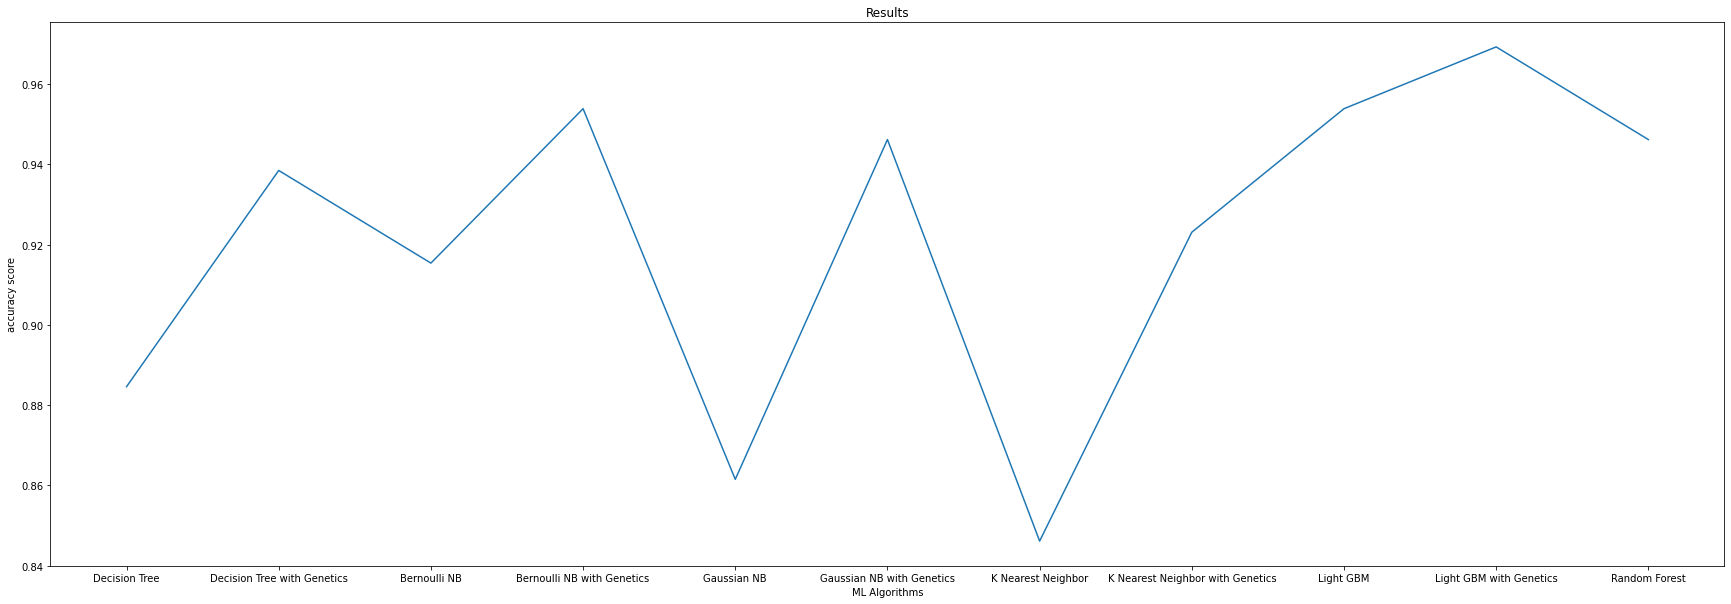

In [ ]:
# Set the size of plot
plt.rcParams["figure.figsize"] = (30,10)

# Plot the scores obtained by these algorithms
test_train_split_results.plotScores()

### 3.3 Using K- Fold Cross Validation

In [ ]:
# Initialize the cross validator

kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
split_indices = next(kf.split(X_label))

X_train_2 = X_label.iloc[split_indices[0]]
Y_train_2 = Y_label.iloc[split_indices[0]]
X_test_2 = X_label.iloc[split_indices[1]]
Y_test_2 = Y_label.iloc[split_indices[1]]

### Classification for 2-Level with using K-fold Validation

In [ ]:
# Perform the analysis

dataset = (X_train_2, X_test_2, Y_train_2, Y_test_2)
k_fold_split_results = MLResultsAnalysis()
trainAndValidateModels(k_fold_split_results, options, dataset)
k_fold_split_results.displayResults()

Decision Tree Classifier
--------------------------------
Accuracy : 0.9076923076923077
---------------------------------------------------------------------------------------------


Decision Tree with Genetics Classifier
--------------------------------
Accuracy : 0.9846153846153847
---------------------------------------------------------------------------------------------


Bernoulli NB Classifier
--------------------------------
Accuracy : 0.8923076923076924
---------------------------------------------------------------------------------------------


Bernoulli NB with Genetics Classifier
--------------------------------
Accuracy : 0.9538461538461539
---------------------------------------------------------------------------------------------


Gaussian NB Classifier
--------------------------------
Accuracy : 0.8923076923076924
---------------------------------------------------------------------------------------------


Gaussian NB with Genetics Classifier
-------------------

In [ ]:
# Set the size of plot
plt.rcParams["figure.figsize"] = (30,10)

# Plot the scores obtained by these algorithms
k_fold_split_results.plotScores()

## 8. Other Ideas

For PCA 
* https://github.com/sharmaroshan/Students-Performance-Analytics/blob/master/Student_Performance.ipynb

For SVR and NN(sklearn based)
* https://github.com/divyansh21april/Student-Performance-Analysis-/blob/master/Student%20Performance%20Analysis.ipynb
* https://github.com/Tsmith5151/udacity-student-intervention/blob/master/student_intervention.ipynb

For Feature Selection
* https://github.com/sachanganesh/student-performance-prediction/blob/master/model.py

Neural Network
* https://github.com/sean-huni/deep-learning/blob/master/part-1/deepl-stud.py

## Prevent random disconnects

This cell runs JS code to automatic reconnect to runtime.

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


### Classification with 5-Level with k-fold validation`

In [ ]:
dataset = (X_train_2, X_test_2, Y_train_2, Y_test_2)
k_fold_split_results = MLResultsAnalysis()
trainAndValidateModels(k_fold_split_results, options, dataset)
k_fold_split_results.displayResults()


Decision Tree Classifier
--------------------------------
Accuracy : 0.6461538461538462
---------------------------------------------------------------------------------------------


Decision Tree with Genetics Classifier
--------------------------------
Accuracy : 0.8
---------------------------------------------------------------------------------------------


Bernoulli NB Classifier
--------------------------------
Accuracy : 0.6615384615384615
---------------------------------------------------------------------------------------------


Bernoulli NB with Genetics Classifier
--------------------------------
Accuracy : 0.6923076923076923
---------------------------------------------------------------------------------------------


Gaussian NB Classifier
--------------------------------
Accuracy : 0.27692307692307694
---------------------------------------------------------------------------------------------


Gaussian NB with Genetics Classifier
--------------------------------


### CLASSIFICATION ALGORITHM FOR 2 LEVEL WITHOUT K-FOLD VALIDATION

In [ ]:
dataset = (X_train_1, X_test_1, Y_train_1, Y_test_1)
test_train_split_results = MLResultsAnalysis()
trainAndValidateModels(test_train_split_results, options, dataset)
test_train_split_results.displayResults()

Decision Tree Classifier
--------------------------------
Accuracy : 0.9076923076923077
---------------------------------------------------------------------------------------------


Decision Tree with Genetics Classifier
--------------------------------
Accuracy : 1.0
---------------------------------------------------------------------------------------------


Bernoulli NB Classifier
--------------------------------
Accuracy : 0.9230769230769231
---------------------------------------------------------------------------------------------


Bernoulli NB with Genetics Classifier
--------------------------------
Accuracy : 0.9692307692307692
---------------------------------------------------------------------------------------------


Gaussian NB Classifier
--------------------------------
Accuracy : 0.9076923076923077
---------------------------------------------------------------------------------------------


Gaussian NB with Genetics Classifier
--------------------------------
A

### Classification 2-Level without G2 and G1, without k-fold valiation

In [ ]:
X_train_1.drop("G2",axis='columns', inplace=True)
X_train_1.drop("G1",axis='columns', inplace=True)
X_test_1.drop("G2",axis='columns', inplace=True)
X_test_1.drop("G1",axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataset = (X_train_1, X_test_1, Y_train_1, Y_test_1)
test_train_split_results = MLResultsAnalysis()
trainAndValidateModels(test_train_split_results, options, dataset)
test_train_split_results.displayResults()

Decision Tree Classifier
--------------------------------
Accuracy : 0.8461538461538461
---------------------------------------------------------------------------------------------


Decision Tree with Genetics Classifier
--------------------------------
Accuracy : 0.9230769230769231
---------------------------------------------------------------------------------------------


Bernoulli NB Classifier
--------------------------------
Accuracy : 0.9230769230769231
---------------------------------------------------------------------------------------------


Bernoulli NB with Genetics Classifier
--------------------------------
Accuracy : 0.9384615384615385
---------------------------------------------------------------------------------------------


Gaussian NB Classifier
--------------------------------
Accuracy : 0.8615384615384616
---------------------------------------------------------------------------------------------


Gaussian NB with Genetics Classifier
-------------------

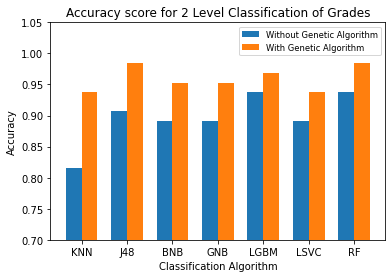

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

index = np.arange(7)
bar_width = 0.35

fig, ax = plt.subplots()
summer = ax.bar(index, [0.815, 0.907, 0.892, 0.892, 0.938, 0.892, 0.938  ], bar_width,
                label="Without Genetic Algorithm")

winter = ax.bar(index+bar_width, [0.938, 0.984, 0.953, 0.953, 0.969, 0.938, 0.9846],
                 bar_width, label="With Genetic Algorithm")

ax.set_xlabel('Classification Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score for 2 Level Classification of Grades')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["KNN", "J48", "BNB", "GNB", "LGBM","LSVC","RF"])
ax.legend(prop=fontP)

plt.ylim(0.7, 1.05)
plt.show()

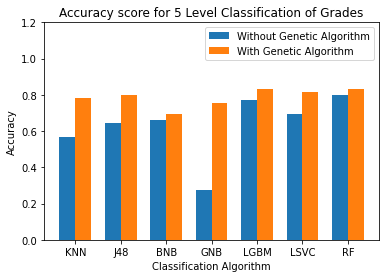

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


index = np.arange(7)
bar_width = 0.35

fig, ax = plt.subplots()
summer = ax.bar(index, [0.569, 0.646, 0.661, 0.276,0.769, 0.692, 0.800  ], bar_width,
                label="Without Genetic Algorithm")

winter = ax.bar(index+bar_width, [0.784, 0.800, 0.692, 0.753, 0.830, 0.815, 0.831],
                 bar_width, label="With Genetic Algorithm")

ax.set_xlabel('Classification Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score for 5 Level Classification of Grades')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["KNN", "J48", "BNB", "GNB", "LGBM","LSVC","RF"])
ax.legend()

plt.ylim(0, 1.2)
plt.show()